##Importing libraries for data pre-processing and EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# reading the given dataset
df=pd.read_csv("titanic_train.csv")

In [ ]:
# displaying starting 5 cols and rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# defining the size of the dataset
df.shape

(891, 12)

In [ ]:
# displaying the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have identified missing values in the Age, Cabin, and Embarked columns.

In [ ]:
# cross verifying the null values with isnull method
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# displaying describtive statistics
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,0.366983,2.378860,0.660333,-0.034838,0.519002,0.353919,-0.175327,1.558195
std,0.482268,0.799928,0.473878,0.953979,1.115343,0.786730,0.462300,0.773866
min,0.000000,1.000000,0.000000,-2.224156,0.000000,0.000000,-0.648422,0.000000
25%,0.000000,2.000000,0.000000,-0.565736,0.000000,0.000000,-0.489442,1.000000
50%,0.000000,3.000000,1.000000,-0.104637,0.000000,0.000000,-0.386671,2.000000
75%,1.000000,3.000000,1.000000,0.356462,1.000000,0.000000,-0.086664,2.000000
max,1.000000,3.000000,1.000000,2.815657,8.000000,6.000000,1.632335,2.000000


In [ ]:
#filling missing values of age col with median values
df['Age'].fillna(df['Age'].median(), inplace=True)

#filling missing values of embarked col with mode values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# dropping unwanted columns
df.drop('Cabin', inplace=True, axis=1)
df.drop('PassengerId', inplace=True, axis=1)
df.drop('Name', inplace=True, axis=1)
df.drop('Ticket', inplace=True, axis=1)


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


###so here we can that our data is clean and ready for further steps

##EDA


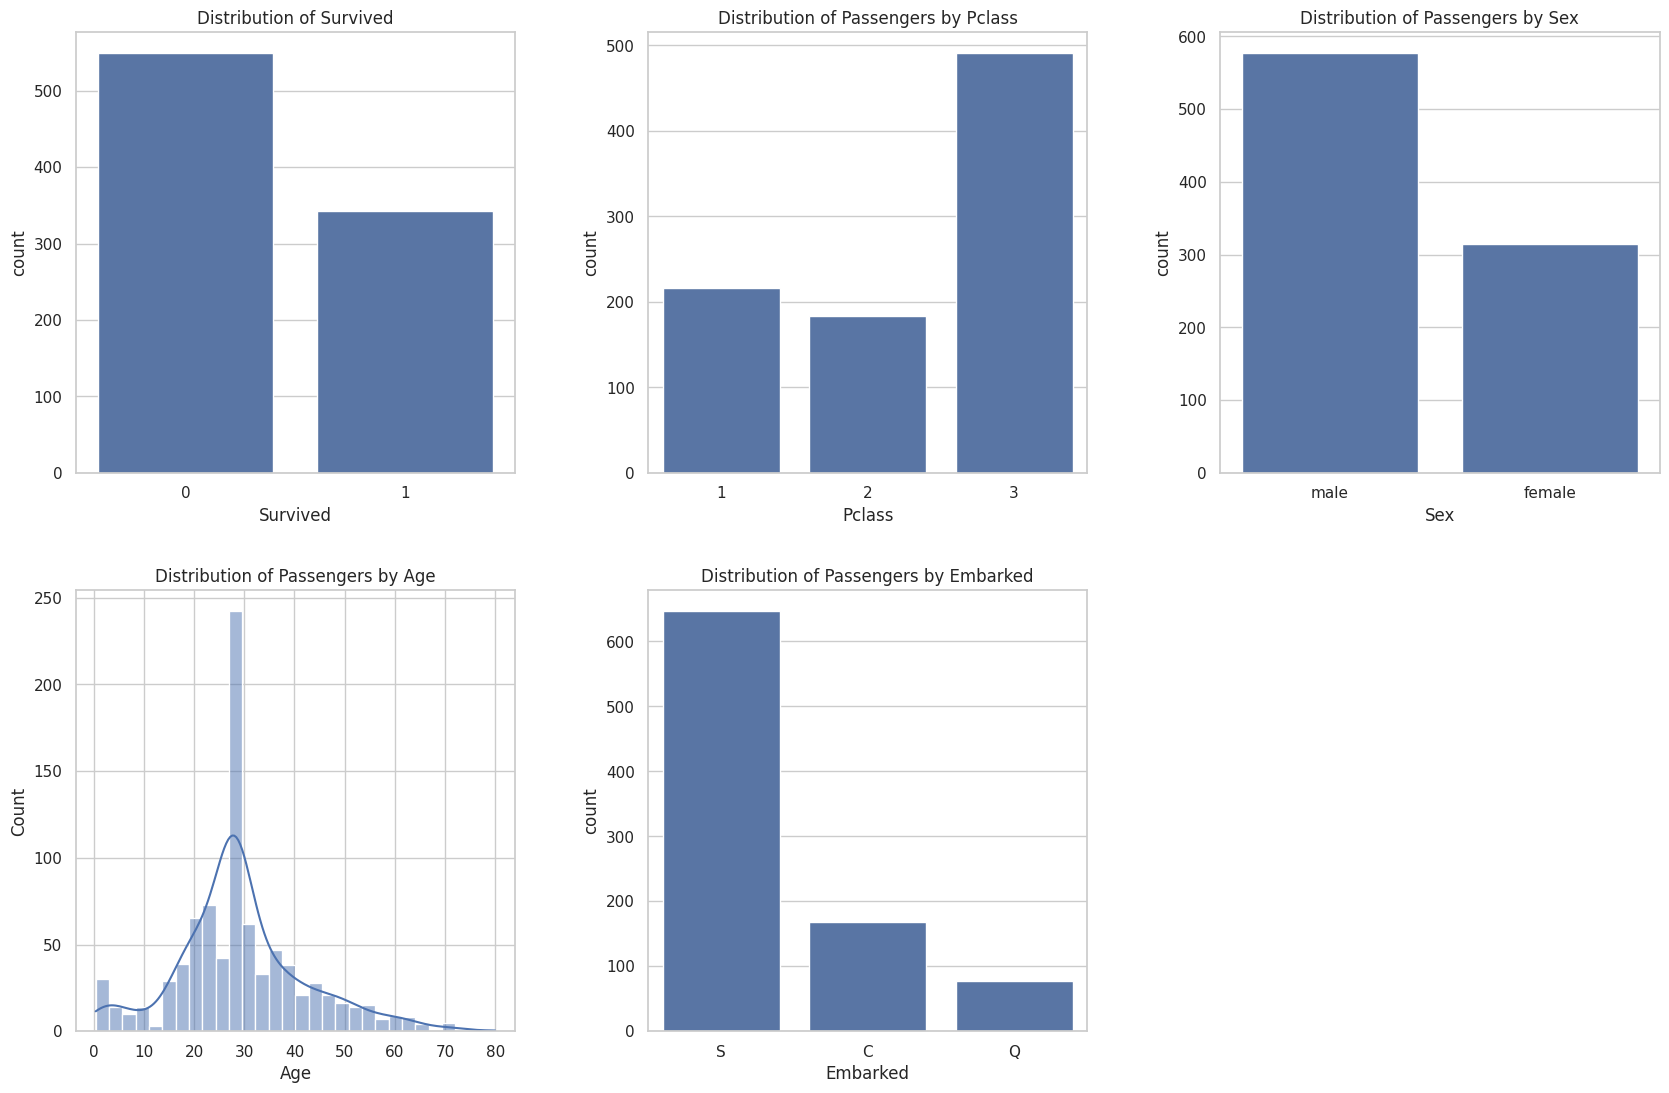

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Adjust the layout
fig.tight_layout(pad=5.0)

# Plot 1: Distribution of Survived
sns.countplot(x='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Survived')

# Plot 2: Distribution of Passengers by Pclass
sns.countplot(x='Pclass', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Passengers by Pclass')

# Plot 3: Distribution of Passengers by Sex
sns.countplot(x='Sex', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Passengers by Sex')

# Plot 4: Distribution of Passengers by Age
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Passengers by Age')

# Plot 5: Distribution of Passengers by Embarked
sns.countplot(x='Embarked', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Passengers by Embarked')

# Hide the last unused subplot (bottom-right)
axes[1, 2].axis('off')

# Display the plots
plt.show()


###From the above eda we can say the following :
1. Most of the Passengers were Died.
2. Most of the Passengers were at the Class 3.
3. Most of the Passengers were males.
4. Port of Embarkation of most of the Passengers was Southampton.

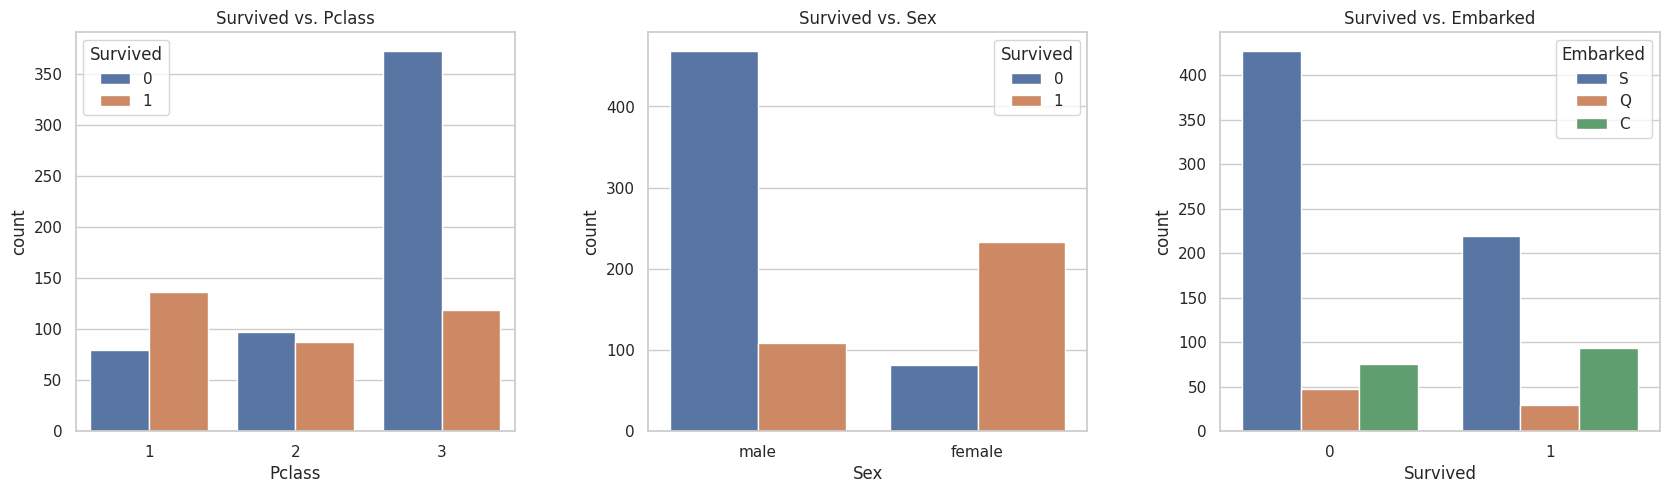

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Adjust the layout
fig.tight_layout(pad=5.0)

# Plot 1: Survived vs. Pclass
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[0])
axes[0].set_title('Survived vs. Pclass')

# Plot 2: Survived vs. Sex
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[1])
axes[1].set_title('Survived vs. Sex')

# Plot 3: Survived vs. Embarked
sns.countplot(x='Survived', hue='Embarked', data=df, ax=axes[2])
axes[2].set_title('Survived vs. Embarked')

# Display the plots
plt.show()


###From the above eda we can say that :
1. mostly 3rd class passengers died and 1st class passengers survived.
2. as above we had said that mostly males passengers died and female suvived.
3. mostly S embarked  passenger died

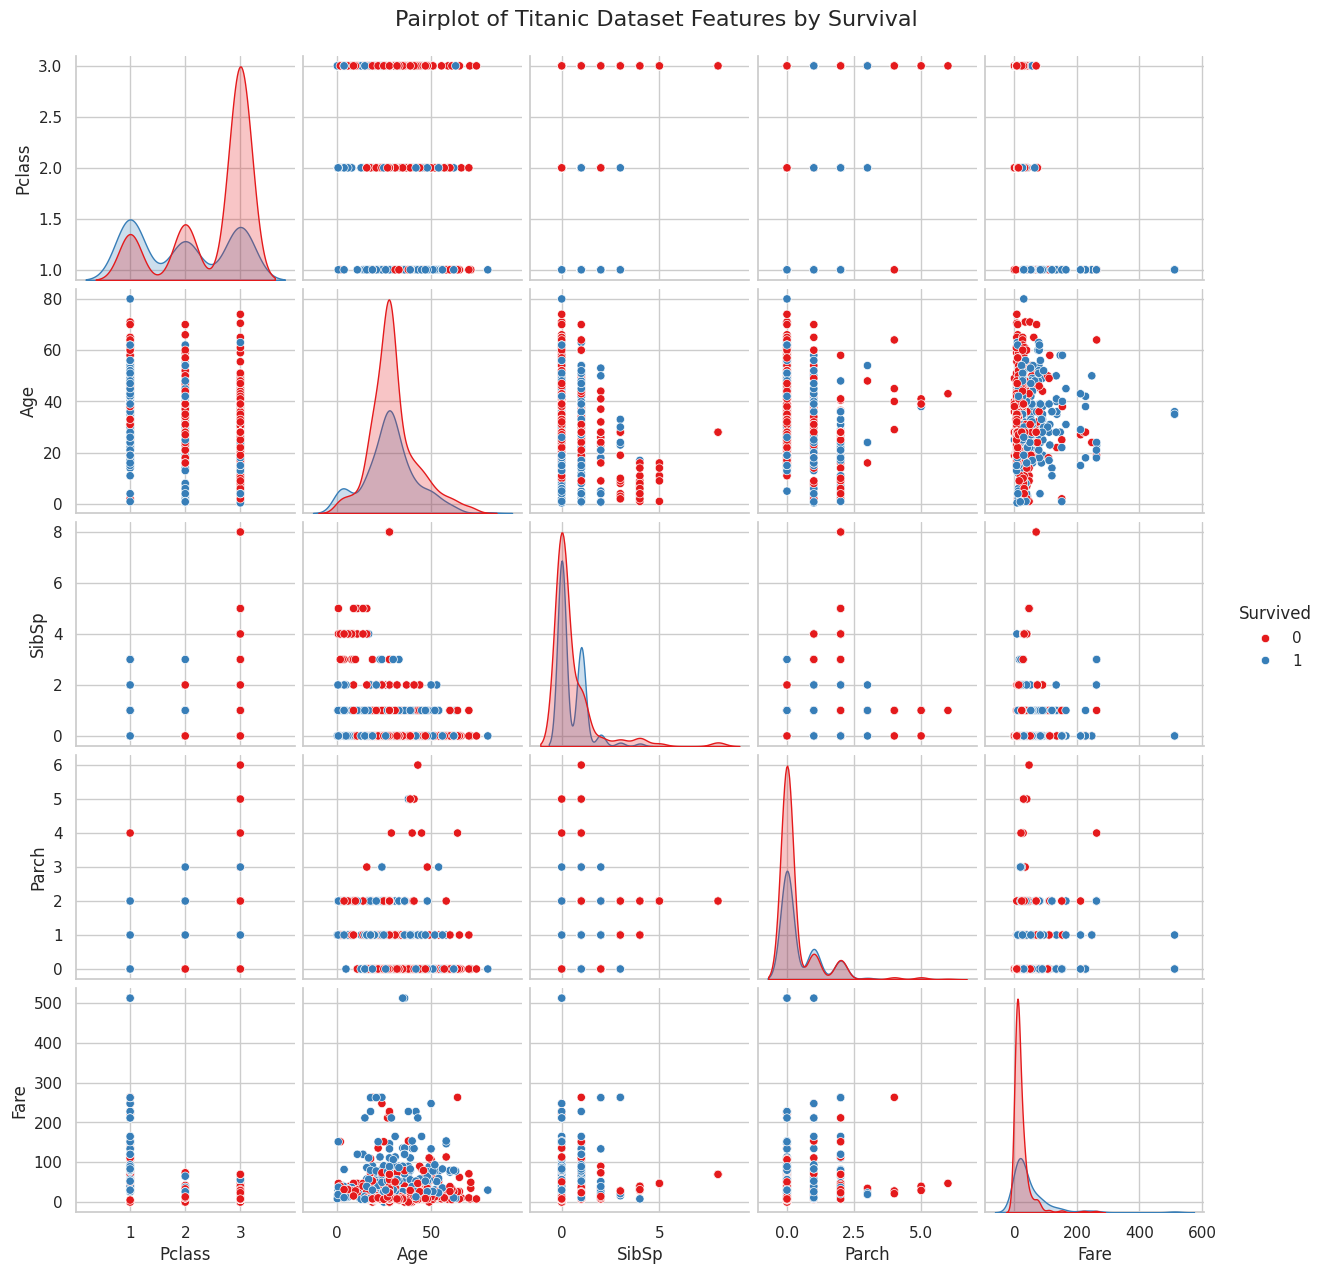

In [ ]:
# Select relevant columns for the pairplot
pairplot_df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# Create the pairplot
pairplot=sns.pairplot(pairplot_df, hue='Survived', diag_kind='kde', palette='Set1')
pairplot.fig.suptitle('Pairplot of Titanic Dataset Features by Survival',
                      y=1.02, fontsize=16)
plt.show()

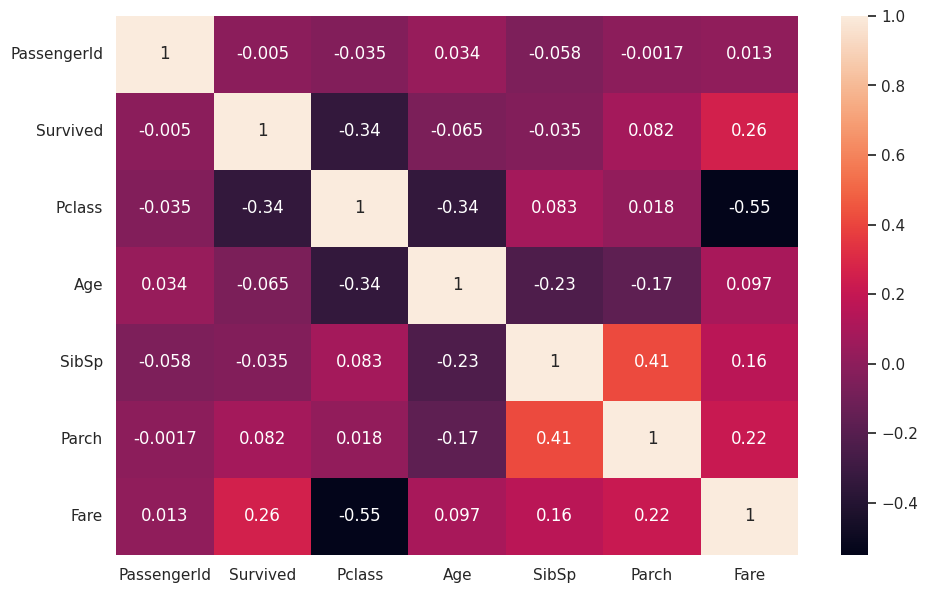

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

###From  both the above correlation graphs we can say the Parch and SibSp has highly corelated where as Fare and Pclass cols are least correlated to each other

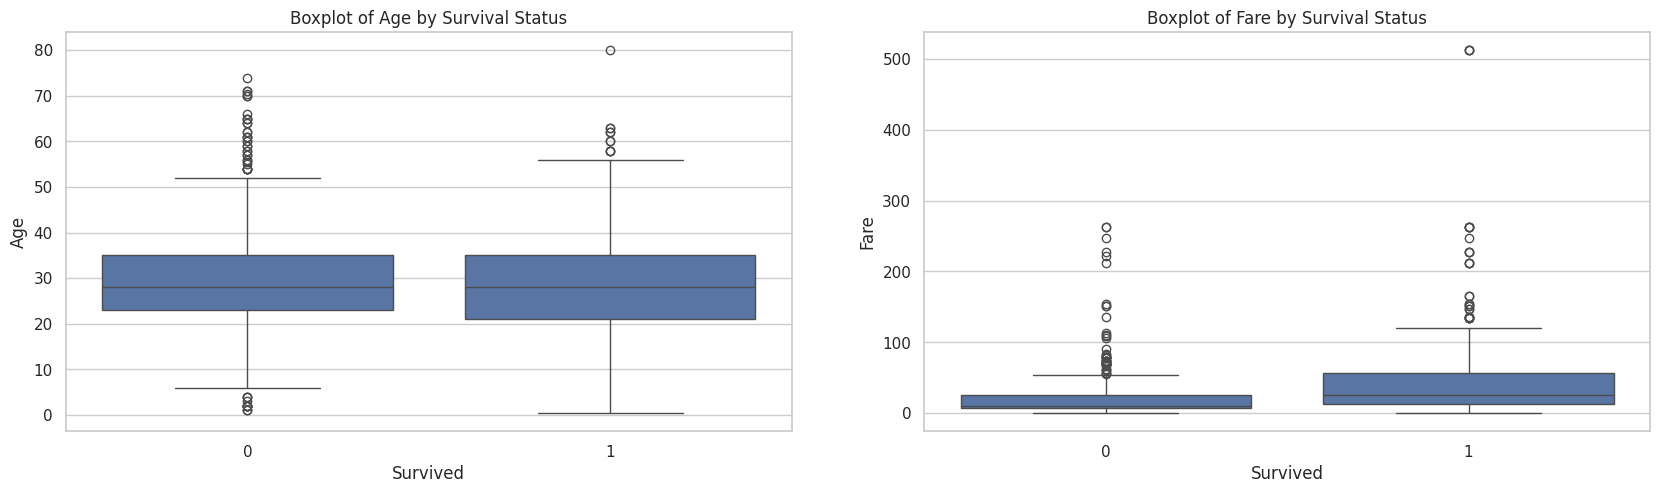

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Adjust the layout
fig.tight_layout(pad=5.0)

# Plot 1: Boxplot for Age by Survival Status
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
axes[0].set_title('Boxplot of Age by Survival Status')

# Plot 2: Boxplot for Fare by Survival Status
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[1].set_title('Boxplot of Fare by Survival Status')

# Display the plots
plt.show()


##Feature Enginnering

<ipython-input-47-e738950e31be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FamilySize', data=df, ax=axs[0], palette='Set1')


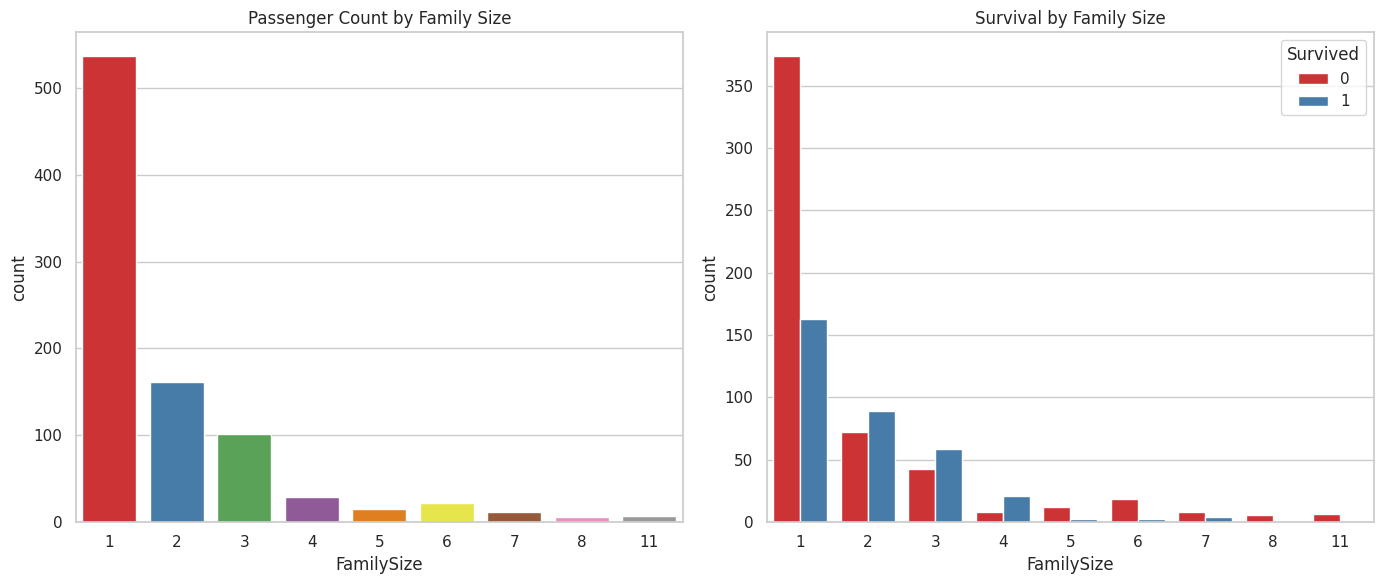

In [ ]:
# creating new collumn as family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Countplot of FamilySize
sns.countplot(x='FamilySize', data=df, ax=axs[0], palette='Set1')
axs[0].set_title('Passenger Count by Family Size')

# Countplot of FamilySize vs Survival
sns.countplot(x='FamilySize', hue='Survived', data=df, ax=axs[1], palette='Set1')
axs[1].set_title('Survival by Family Size')

plt.tight_layout()
plt.show()

###here we can conlude that the least family size was 1 person and max family size of 11 people  and the families with size of 8 or 11 almost the family died.

In [ ]:
# Label Encoding for 'Sex' and 'Embarked'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
# Scaling features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [ ]:
#Outlier handling using z-score:
from scipy import stats
df = df[(np.abs(stats.zscore(df[['Age', 'Fare']])) < 3).all(axis=1)]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2


##Importing libraries required for model building

In [100]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##RandomForestClassifier model

In [ ]:
# Train a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("RandomForestClassifier model accuracy",accuracy)
print( '\n',classification_rep)

RandomForestClassifier model accuracy 0.7692307692307693

               precision    recall  f1-score   support

           0       0.85      0.80      0.83       115
           1       0.62      0.70      0.66        54

    accuracy                           0.77       169
   macro avg       0.74      0.75      0.74       169
weighted avg       0.78      0.77      0.77       169



##KNeighborsClassifier model

In [ ]:
# Train a KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
print("KNN model accuracy",accuracy_knn)
print( '\n',classification_rep_knn)


KNN model accuracy 0.7514792899408284

               precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.62      0.57      0.60        54

    accuracy                           0.75       169
   macro avg       0.71      0.70      0.71       169
weighted avg       0.75      0.75      0.75       169



##LogisticRegression model

In [ ]:
# Train a LogisticRegression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)
print("Logistic Regression model accuracy",accuracy_logreg)
print( '\n',classification_rep_logreg)


Logistic Regression model accuracy 0.7869822485207101

               precision    recall  f1-score   support

           0       0.85      0.83      0.84       115
           1       0.66      0.69      0.67        54

    accuracy                           0.79       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.79      0.79      0.79       169



##SVC model

In [ ]:
# Train an SVC model
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_rep_svc = classification_report(y_test, y_pred_svc)
print("SVC model accuracy",accuracy_svc)
print( '\n',classification_rep_svc)


SVC model accuracy 0.7692307692307693

               precision    recall  f1-score   support

           0       0.82      0.84      0.83       115
           1       0.65      0.61      0.63        54

    accuracy                           0.77       169
   macro avg       0.73      0.73      0.73       169
weighted avg       0.77      0.77      0.77       169



###After performing different models logistics regression model is giving the best accuracy that is 78%


##Hyper-Parameter Tuning:

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000,random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score
# Best Parameters and Score
print("Best Parameters for Logistic Regression :",best_params)
print("Best Accuracy Score:", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression : {'C': 0.1, 'solver': 'saga'}
Best Accuracy Score: 0.7978993919292428


##Cross-validation

In [ ]:
# Cross-validation for Logistic Regression
logreg_cv = LogisticRegression(**best_params)
cv_scores = cross_val_score(logreg_cv, X_train, y_train, cv=5)

print("Logistic Regression Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Logistic Regression Cross-Validation Scores: [0.77777778 0.83703704 0.79259259 0.81343284 0.76865672]
Mean Cross-Validation Score: 0.7978993919292428


## final model with best parameters

In [ ]:
# Train a LogisticRegression model with the best parameters
best_logreg_model = LogisticRegression(C=1, solver='liblinear', max_iter=1000, random_state=42)
best_logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_best_logreg = best_logreg_model.predict(X_test)

# Evaluate the model
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
classification_rep_best_logreg = classification_report(y_test, y_pred_best_logreg)
print("Accuracy of the model with best parameters ", accuracy_best_logreg)
print('\n',classification_rep_best_logreg)

Accuracy of the model with best parameters  0.7869822485207101

               precision    recall  f1-score   support

           0       0.84      0.85      0.84       115
           1       0.67      0.65      0.66        54

    accuracy                           0.79       169
   macro avg       0.76      0.75      0.75       169
weighted avg       0.79      0.79      0.79       169

